In [2]:
#initialize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


k=10 #no of clusters,no of genes

df=pd.read_excel('C:\\Users\\diwak\\Documents\\Ge\\Normalized_Mean.xlsx')

for i in range(df.shape[0]):
  for j in range(df.shape[1]):
     df.iloc[i, j]=df.iloc[i, j]*100000


In [3]:
#poulation
population_size=50                      # no of chromosoms in a population 
pop=[]                                         
FitesstPop=[]
for i in range(population_size):
    pop.append(df.sample(k))
    pop[i].sort_values(by=['N_Mean']) 


fittest_gen=[]
poolidx=[0,1]

In [4]:

def kmeans_c():
    for i in range(population_size):                      #itterate for each chromosome

        global centroid 
        centroid=pop[i]
        
        global col
        data=['g','r','b','y','c','m','orange','indigo','teal','maroon']
        col=pd.DataFrame(data)

    #assignment
        flag=0
        count=1

        while flag==0 and count<=25:

            for j in range(k):
                try:
                    df['dist_from_{}'.format(j+1)]= (np.sqrt((df['N_Mean']-centroid.iloc[j,0])**2 + (df['P_Mean']-centroid.iloc[j,1])**2))
                except:
                    continue

               
            df['closest']=df[['dist_from_{}'.format(u+1) for u in range(k)]].idxmin(axis=1)
            df['closest']=df['closest'].map(lambda x: int(x.lstrip('dist_from_')))
           # df['colour']=df['closest'].map(lambda x: col.iat[x-1,0])
        #update
            old_centeroid=centroid
            centroid=df.groupby(['closest'])[['N_Mean','P_Mean']].mean()
            
            colmn=df.closest.unique()
    
           # print(colmn.size,"..",colmn)
            for tt in range (1,k+1):
                for jj in range(colmn.size):
                    found=0
                    if tt==colmn[jj]:
                        found=1
                    if found==0:
                        try:
                            centroid.append(old_centeroid.iloc[tt-1])
                        except:
                            continue

            count+=1
            flag=1
          
            for q in range(k):

                try:
                    if(centroid.iat[q,0]!=old_centeroid.iat[q,0] or centroid.iat[q,1]!=old_centeroid.iat[q,1] ):
                          flag=0
                          break
                except:
                    continue
                    
                    
                  


 ####  FITNESS_____________  

                
        dist=df.groupby(['closest'])[['dist_from_{}'.format(t+1) for t in range(k)]].sum()

        M=0
        for y in range(k):
            try:
                M=M + dist.iat[y,y]
            except:
                continue
        centroid['fitness']= (1/M) * 1000  
        
        centroid.sort_values(by=['N_Mean']) 
        pop[i]=centroid

        

In [5]:
def selection():  
    global poolidx 
    poolidx=[0,1]  
    for f in range(population_size-1):
        if (pop[f+1].iloc[0,2]>pop[poolidx[0]].iloc[0,2]):
            poolidx[1]=poolidx[0]
            poolidx[0]=f+1
        elif pop[f+1].iloc[0,2]>pop[poolidx[1]].iloc[0,2]:
            poolidx[1]=f+1
    fittest_gen.append(pop[poolidx[0]])


In [6]:
def crossover():
    c = random.uniform(0,1)

    if c<0.8:
        cp=random.randint(1,k)
        
        champ1=pop[poolidx[0]].iloc[:,0:2]
        champ2=pop[poolidx[1]].iloc[:,0:2]
        for z in range(cp,3):
            temp= champ1.iloc[z]
            champ1.iloc[z]= champ2.iloc[z]
            champ2.iloc[z]=temp
        champ1=champ1.drop_duplicates(keep=False)
        champ2=champ2.drop_duplicates(keep=False)
        
        if (champ1.shape[0]==k and champ2.shape[0]==k):
            pop[poolidx[0]]=champ1
            pop[poolidx[1]]=champ2
        
       

In [7]:
def mutation():
    mut=random.uniform(0,1)

    if mut<=0.05 :
        gnew=random.randint(0,2)
        b=random.random()


        if pop[poolidx[0]].iloc[gnew,0]!=0:
            op=random.randint(0,1)
            if op==0:
                pop[poolidx[0]].iloc[gnew,0]= pop[poolidx[0]].iloc[gnew,0] + 2 * b * pop[poolidx[0]].iloc[gnew,0] 
                pop[poolidx[0]].iloc[gnew,1]= pop[poolidx[0]].iloc[gnew,1] + 2 * b * pop[poolidx[0]].iloc[gnew,1]
            else:
                pop[poolidx[0]].iloc[gnew,0]=abs(pop[poolidx[0]].iloc[gnew,0] - 2 * b * pop[poolidx[0]].iloc[gnew,0] )
                pop[poolidx[0]].iloc[gnew,1]=abs(pop[poolidx[0]].iloc[gnew,1] - 2 * b * pop[poolidx[0]].iloc[gnew,1])
        else:
            if op==0:
                pop[poolidx[0]].iloc[gnew,0] = pop[poolidx[0]].iloc[gnew,0] + 2 * b 
                pop[poolidx[0]].iloc[gnew,1] = pop[poolidx[0]].iloc[gnew,1] + 2 * b 
            else:
                pop[poolidx[0]].iloc[gnew,0] =abs(pop[poolidx[0]].iloc[gnew,0] - 2 * b)
                pop[poolidx[0]].iloc[gnew,1] = abs(pop[poolidx[0]].iloc[gnew,1] - 2 * b)
      

In [8]:
gen_size=50    
kmeans_c()
for m in range(gen_size):
    selection()
    crossover()
    mutation()
    kmeans_c()


In [9]:
for vt in fittest_gen:
    FitesstPop.append(vt.iloc[0,2])
print(FitesstPop)   

[0.004044055651206514, 0.004044055651206514, 0.004044055651206514, 0.00404572540820921, 0.004044055651206513, 0.004044055651206513, 0.004044055651206513, 0.004044055651206513, 0.004044055651206513, 0.004044055651206513, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.003988920496638576, 0.00398892

Text(0, 0.5, 'Fitness')

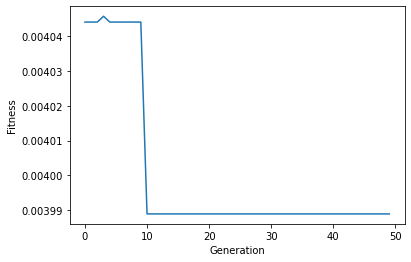

In [10]:
plt.plot(FitesstPop)
plt.xlabel('Generation')
plt.ylabel('Fitness')

Text(0, 0.5, 'PD reading')

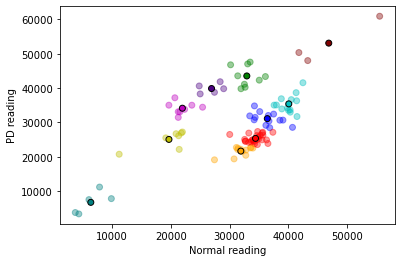

In [11]:
crr=fittest_gen[2]
for j in range(k):
    df['dist_from_{}'.format(j+1)]= (np.sqrt((df['N_Mean']-crr.iloc[j,0])**2 + (df['P_Mean']-crr.iloc[j,1])**2))

df['closest']=df[['dist_from_{}'.format(u+1) for u in range(k)]].idxmin(axis=1)
df['closest']=df['closest'].map(lambda x: int(x.lstrip('dist_from_')))
df['colour']=df['closest'].map(lambda x: col.iat[x-1,0])
plt.scatter(df['N_Mean'],df['P_Mean'],color=df['colour'],alpha=0.4)
for i in range(k):
     try:
        plt.scatter(crr['N_Mean'],crr['P_Mean'], color=col[i],edgecolor='k')
     except:
        continue
    
plt.xlabel('Normal reading')
plt.ylabel('PD reading')

In [12]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(df)

,N_Mean,P_Mean,dist_from_1,dist_from_2,dist_from_3,dist_from_4,dist_from_5,dist_from_6,dist_from_7,dist_from_8,dist_from_9,dist_from_10,closest,colour
0,30168.446,46793.407,4264.869,21865.995,16883.223,24145.727,15092.812,15081.406,25212.784,7636.171,46625.863,17867.511,1,g
1,36524.122,23858.010,20010.920,2580.698,7253.371,16892.936,12079.705,17825.667,5118.905,18678.158,34695.859,31034.895,2,r
2,35523.900,24919.457,18803.840,1188.302,6255.846,15851.273,11429.451,16398.925,4879.278,17256.394,34380.655,30395.765,2,r
3,33075.509,47049.473,3508.914,21747.191,16286.141,25762.186,13585.218,17033.953,25435.314,9446.094,48388.014,15078.476,1,g
4,24829.140,40630.223,8609.053,18043.010,14999.774,16413.149,16114.215,7095.221,20266.683,2225.444,38627.681,25339.952,8,indigo
5,34635.661,24978.464,18643.267,427.154,6386.789,14962.675,11758.742,15637.701,4308.970,16778.955,33662.697,30684.568,2,r
6,38889.598,33937.421,11304.498,9689.578,3752.958,21172.970,1884.826,16928.222,14139.168,13359.788,42421.127,20774.849,5,c
7,40709.105,28556.612,16885.472,7067.851,4991.098,21326.561,6877.677,19560.277,11191.369,17839.456,40706.757,25320.901,3,b
8,35673.237,26291.886,17468.382,1576.556,4876.432,16048.372,10119.235,15797.859,5982.623,16161.417,35251.300,29069.343,2,r
9,41325.373,38675.381,9704.487,15016.937,9015.442,25583.700,3502.338,19886.895,19463.263,14451.207,47375.805,15470.357,5,c


In [17]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(df2
           )

,ID_Ref,Gene Symbol,Entrez ID,N_Mean,P_Mean
0,203540_at,GFAP,2670,0.302,0.468
1,1558919_a_at,SEC23IP,11196,0.365,0.239
2,203755_at,BUB1B,701,0.355,0.249
3,201429_s_at,RPL37A,6168,0.331,0.470
4,207783_x_at,HUWE1,10075,0.248,0.406
5,207166_at,GNGT1,2792,0.346,0.250
6,1554053_at,SPTLC1,10558,0.389,0.339
7,210316_at,FLT4,2324,0.407,0.286
8,1558556_at,AX748417 /// CAMK1,8536,0.357,0.263
9,1557981_at,RPS9,6203,0.413,0.387
